In [1]:
# 1 store data from API to cloud database
import requests, json
from datetime import datetime, timedelta
import pandas as pd

url = 'http://api.worldweatheronline.com/premium/v1/past-weather.ashx'
q = input('Please enter the City name: ')
now = datetime.now()
enddate = now.strftime('%Y-%m-%d')
date = '2008-07-01'
key = 'db8629b5a0074e0db90221109212910'
rst = {}

while date < enddate:
    params = {'q':q,'date':date,'enddate':enddate,'key':key,'format':'json', 'tp':24}
    rsp = requests.get(url, params=params)
    for a in rsp.json()['data']['weather']:
        weather = {}
        dt = a['date']
        weather['maxtempC'] = a['maxtempC']
        weather['mintempC'] = a['mintempC']
        weather['avgtempC'] = a['avgtempC']
        weather['sunhour'] = a['sunHour']
        weather['description'] = a['hourly'][0]['weatherDesc'][0]['value']
        rst[dt] = weather
    dt = datetime.strptime(dt, '%Y-%m-%d') + timedelta(days=1)
    dt = datetime.strftime(dt, '%Y-%m-%d')
    date = dt

url = f'https://inf551-bcf4f-default-rtdb.firebaseio.com/{q}.json'
requests.put(url,json.dumps(rst))

Please enter the City name: Los Angeles


<Response [200]>

In [2]:
# 2 load data from database, and check the raw data
import requests, json
from datetime import datetime, timedelta
import pandas as pd

q = input('Please enter the City name: ')
rsp = requests.get(f'https://inf551-bcf4f-default-rtdb.firebaseio.com/{q}.json').json()
df = pd.DataFrame.from_dict(rsp).T
df['avgtempC'] = df['avgtempC'].astype(str).astype(int)
df['maxtempC'] = df['maxtempC'].astype(str).astype(int)
df['mintempC'] = df['mintempC'].astype(str).astype(int)
df['sunhour'] = df['sunhour'].astype(str).astype(float)
df['description'] = df['description'].astype(str)
df


Please enter the City name: Los Angeles


,avgtempC,description,maxtempC,mintempC,sunhour
2008-07-01,28,Sunny,31,17,14.5
2008-07-02,28,Sunny,31,17,14.5
2008-07-03,28,Sunny,32,18,14.5
2008-07-04,30,Sunny,34,19,14.5
2008-07-05,28,Sunny,31,18,14.5
...,...,...,...,...,...
2021-11-29,23,Sunny,27,18,8.7
2021-11-30,22,Sunny,27,17,8.7
2021-12-01,24,Sunny,29,19,8.7
2021-12-02,21,Sunny,25,18,8.7


In [3]:
# 3
df.describe()

,avgtempC,maxtempC,mintempC,sunhour
count,4904.000000,4904.000000,4904.000000,4904.000000
mean,20.841966,24.111542,15.030179,11.160604
std,5.374427,5.573494,5.131903,2.660516
min,5.000000,7.000000,0.000000,3.700000
25%,17.000000,20.000000,11.000000,8.700000
50%,21.000000,24.000000,15.000000,11.600000
75%,25.000000,28.000000,19.000000,13.400000
max,39.000000,42.000000,36.000000,14.500000


In [4]:
# 4 extract metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 2008-07-01 to 2021-12-03
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avgtempC     4904 non-null   int64  
 1   description  4904 non-null   object 
 2   maxtempC     4904 non-null   int64  
 3   mintempC     4904 non-null   int64  
 4   sunhour      4904 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 229.9+ KB


<AxesSubplot:>

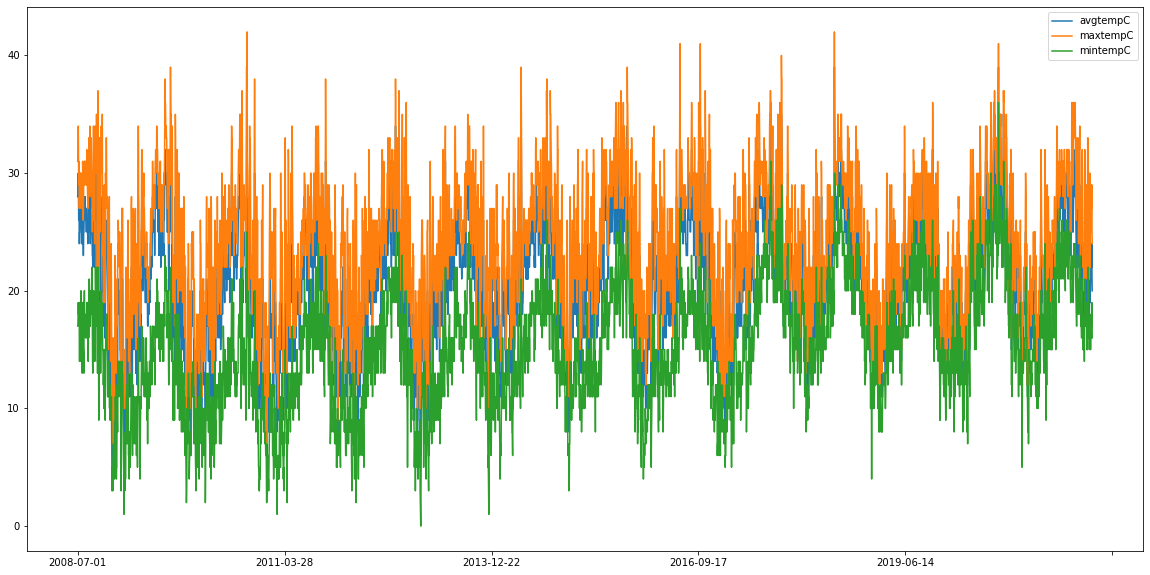

In [5]:
# 5 Plot the line chart
import matplotlib.pyplot as plt

df.iloc[:,[0,2,3]].plot.line(figsize=(20,10))


<AxesSubplot:title={'center':'Average temperature chart'}>

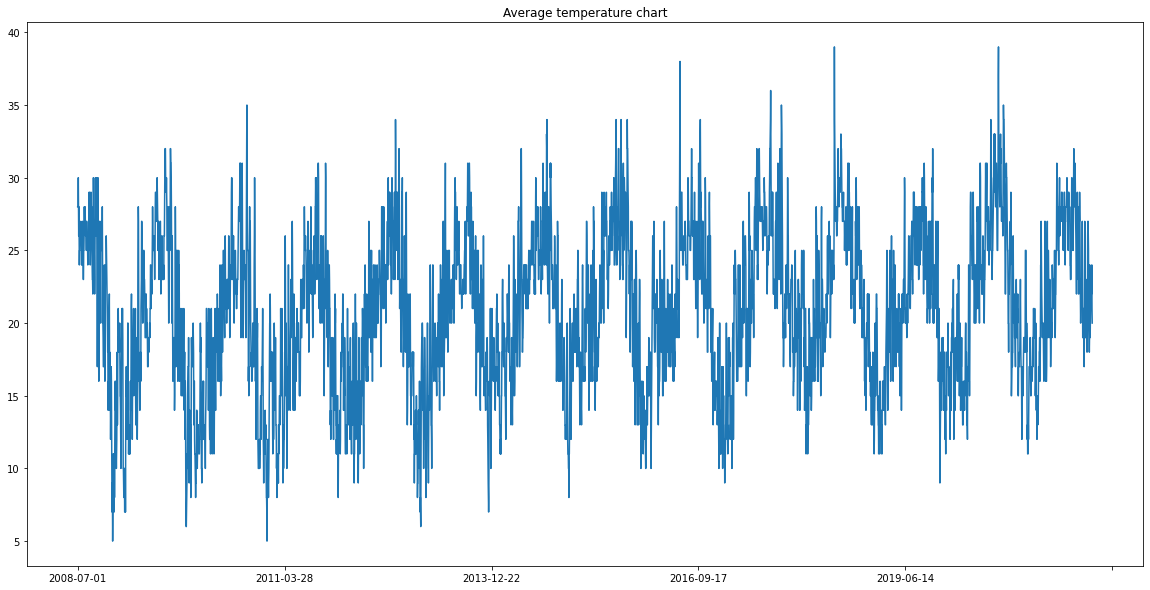

In [6]:
# 6
df.iloc[:,0].plot.line(figsize=(20,10), title = 'Average temperature chart')

In [7]:
# 7
import numpy as np
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')
fit = auto_arima(df['avgtempC'], trace = True, Suppress_warnings = True, D=1)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20863.763, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21612.281, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21506.678, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21466.835, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21610.284, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20919.510, Time=1.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20862.018, Time=1.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21451.296, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21347.199, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20863.758, Time=1.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=21225.098, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20865.540, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=20860.039, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21449.298, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4904
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -10426.019
Date:                Fri, 03 Dec 2021   AIC                          20860.039
Time:                        20:05:29   BIC                          20886.029
Sample:                             0   HQIC                         20869.157
                               - 4904                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9703      0.014     67.239      0.000       0.942       0.999
ar.L2         -0.3025      0.013    -24.052      0.000      -0.327      -0.278
ma.L1         -0.9083      0.009   -101.566      0.000      -0.926      -0.891
sigma2         4.1161      0.071     58.056      0.000       3.977       4.255
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               127.85
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 8
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

train = df['avgtempC'].iloc[:-30]
test = df['avgtempC'].iloc[-30:]
model = ARIMA(train, order=(2, 1, 1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.avgtempC   No. Observations:                 4873
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10363.291
Method:                       css-mle   S.D. of innovations              2.029
Date:                Fri, 03 Dec 2021   AIC                          20736.582
Time:                        20:06:46   BIC                          20769.039
Sample:                    07-02-2008   HQIC                         20747.973
                         - 11-03-2021                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0012      0.008     -0.143      0.886      -0.017       0.015
ar.L1.D.avgtempC     0.9706      0.015     64.317      0.000       0.941       1.000
ar.L2.D.avgtempC    -0.3028      0.014    -21.582      0.000      -0.330      -0.275
ma.L1.D.avgtempC    -0.9080      0.008   -112.519      0.000      -0.924      -0.892
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6029           -0.8565j            1.8174           -0.0781
AR.2            1.6029           +0.8565j            1.8174            0.0781
MA.1            1.1013           +0.0000j            1.1013            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
# 9
start = len(train)
end = len(train) + len(test) - 1
prediction = model.predict(start=start, end=end, typ='levels')
prediction.index = df.index[start:end+1]
print(prediction)

2021-11-04    21.390701
2021-11-05    21.466767
2021-11-06    21.421923
2021-11-07    21.354985
2021-11-08    21.303209
2021-11-09    21.272839
2021-11-10    21.258654
2021-11-11    21.253698
2021-11-12    21.252799
2021-11-13    21.253044
2021-11-14    21.253170
2021-11-15    21.252836
2021-11-16    21.252089
2021-11-17    21.251083
2021-11-18    21.249949
2021-11-19    21.248769
2021-11-20    21.247585
2021-11-21    21.246409
2021-11-22    21.245243
2021-11-23    21.244084
2021-11-24    21.242929
2021-11-25    21.241775
2021-11-26    21.240622
2021-11-27    21.239469
2021-11-28    21.238315
2021-11-29    21.237161
2021-11-30    21.236008
2021-12-01    21.234854
2021-12-02    21.233700
2021-12-03    21.232546
dtype: float64


<AxesSubplot:title={'center':'Actual temperature and predicted temperature'}>

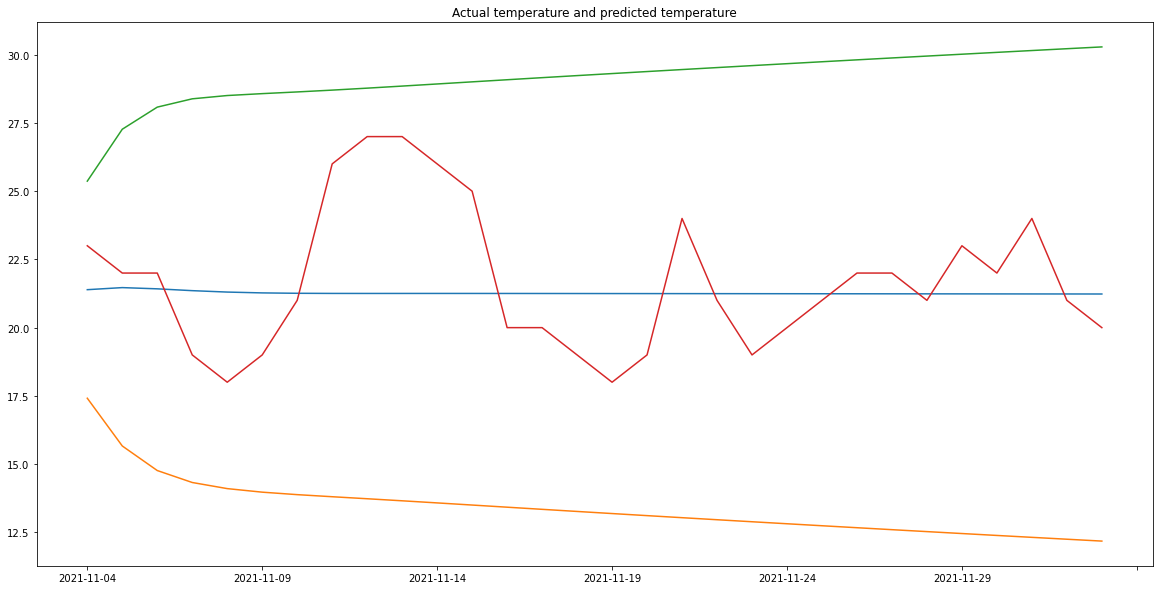

In [10]:
# 10
fc, se, conf = model.forecast(30, alpha=0.05) 
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

fc_series.plot()
lower_series.plot()
upper_series.plot()
test.plot(figsize=(20,10), title = 'Actual temperature and predicted temperature')

In [11]:
# 11
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(prediction, test))
print(f'Mean value of the test data is: {test.mean()}')
print(f'Root-mean-square deviation is: {rmse}')

Mean value of the test data is: 21.7
Root-mean-square deviation is: 2.5965553391337655


In [12]:
# 12
from datetime import datetime, timedelta

now = datetime.now()
enddate = now.strftime('%Y-%m-%d')
a = input('Please enter the number of days you want to predict:')
model = ARIMA(df['avgtempC'], order=(2,1,1)).fit()
prediction = model.predict(start=len(df), end=len(df)+int(a), typ='levels')
dt = df.index[-1]
prediction.index = pd.date_range(start=datetime.strptime(dt, '%Y-%m-%d') + timedelta(days=1),
                                end=(datetime.strptime(dt, '%Y-%m-%d') + timedelta(days=1+int(a)))).astype('string')
prediction


Please enter the number of days you want to predict:30


2021-12-04T00:00:00.000000000    20.118093
2021-12-05T00:00:00.000000000    20.534833
2021-12-06T00:00:00.000000000    20.903075
2021-12-07T00:00:00.000000000    21.133909
2021-12-08T00:00:00.000000000    21.246094
2021-12-09T00:00:00.000000000    21.284726
2021-12-10T00:00:00.000000000    21.287890
2021-12-11T00:00:00.000000000    21.278890
2021-12-12T00:00:00.000000000    21.268821
2021-12-13T00:00:00.000000000    21.261393
2021-12-14T00:00:00.000000000    21.256851
2021-12-15T00:00:00.000000000    21.254311
2021-12-16T00:00:00.000000000    21.252840
2021-12-17T00:00:00.000000000    21.251800
2021-12-18T00:00:00.000000000    21.250855
2021-12-19T00:00:00.000000000    21.249873
2021-12-20T00:00:00.000000000    21.248825
2021-12-21T00:00:00.000000000    21.247724
2021-12-22T00:00:00.000000000    21.246593
2021-12-23T00:00:00.000000000    21.245447
2021-12-24T00:00:00.000000000    21.244297
2021-12-25T00:00:00.000000000    21.243147
2021-12-26T00:00:00.000000000    21.241999
2021-12-27T

In [13]:
# 13

rst = prediction.to_dict()
url = f'https://inf551-bcf4f-default-rtdb.firebaseio.com/{q}/prediction.json'
requests.put(url,json.dumps(rst))
print(f'json data is successfuly loaded to {url}')

json data is successfuly loaded to https://inf551-bcf4f-default-rtdb.firebaseio.com/Los Angeles/prediction.json
